# Exploración de datos (EDA)
### El objetivo es explorar y comprender la naturaleza de los datos antes de iniciar procesamiento y modelado.

## Importación de librerías

In [80]:
import os
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Carga de datos

In [64]:
current_working_dir = os.getcwd()
parent_dir = os.path.dirname(current_working_dir)
relative_path = 'data/raw'
path_data_raw = os.path.abspath(
        os.path.join(parent_dir + "/" + relative_path))
print(f"Path to data raw: {path_data_raw}")

Path to data raw: /home/juancarlos/Documentos/globant-project/data/raw


In [65]:
def read_xml_file(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    return root

In [66]:
# Listar los archivos en el directorio
xml_files = os.listdir(path_data_raw)

# Contar el número de archivos
num_files = len(xml_files)
print(f"Hay {num_files} archivos .xml en el directorio .\n")

# Leer y mostrar el contenido de un archivo XML
sample_file = os.path.join(path_data_raw, xml_files[0])
sample_data_xml = read_xml_file(sample_file)

# Mostrar un ejemplo del XML cargado
ET.dump(sample_data_xml)


Hay 1000 archivos .xml en el directorio .

<rootTag>
<Award>
<AwardTitle>RUI:  Terpenes as Versatile Building Blocks for Multivalent Polymeric and Nanoparticle Systems</AwardTitle>
<AGENCY>NSF</AGENCY>
<AwardEffectiveDate>06/01/2020</AwardEffectiveDate>
<AwardExpirationDate>05/31/2025</AwardExpirationDate>
<AwardTotalIntnAmount>295200.00</AwardTotalIntnAmount>
<AwardAmount>295200</AwardAmount>
<AwardInstrument>
<Value>Standard Grant</Value>
</AwardInstrument>
<Organization>
<Code>03090000</Code>
<Directorate>
<Abbreviation>MPS</Abbreviation>
<LongName>Direct For Mathematical &amp; Physical Scien</LongName>
</Directorate>
<Division>
<Abbreviation>CHE</Abbreviation>
<LongName>Division Of Chemistry</LongName>
</Division>
</Organization>
<ProgramOfficer>
<SignBlockName>Tomislav Pintauer</SignBlockName>
<PO_EMAI>tompinta@nsf.gov</PO_EMAI>
<PO_PHON>7032927168</PO_PHON>
</ProgramOfficer>
<AbstractNarration>In this project funded by the Macromolecular, Supramolecular, and Nanochemistry Program

## Extracción de datos relevantes

In [67]:
path_xml_files = []
for file in xml_files:
    link = os.path.join(path_data_raw, file)
    path_xml_files.append(link)

path_xml_files[:2]

['/home/juancarlos/Documentos/globant-project/data/raw/2002362.xml',
 '/home/juancarlos/Documentos/globant-project/data/raw/2001671.xml']

In [68]:
def extract_info_from_xml(xml_root, file_name):
    award_info = {}
    award_info['FileName'] = file_name
    award_info['AwardTitle'] = xml_root.findtext('.//AwardTitle')
    award_info['AGENCY'] = xml_root.findtext('.//AGENCY')
    award_info['AwardEffectiveDate'] = xml_root.findtext('.//AwardEffectiveDate')
    award_info['AwardExpirationDate'] = xml_root.findtext('.//AwardExpirationDate')
    award_info['AwardAmount'] = xml_root.findtext('.//AwardAmount')
    award_info['AbstractNarration'] = xml_root.findtext('.//AbstractNarration')
    
    return award_info

In [69]:
def process_xml_file(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    return extract_info_from_xml(root, os.path.basename(file_path))

In [70]:
awards_data = [process_xml_file(file) for file in path_xml_files]

In [71]:
awards_data[:2]

[{'FileName': '2002362.xml',
  'AwardTitle': 'RUI:  Terpenes as Versatile Building Blocks for Multivalent Polymeric and Nanoparticle Systems',
  'AGENCY': 'NSF',
  'AwardEffectiveDate': '06/01/2020',
  'AwardExpirationDate': '05/31/2025',
  'AwardAmount': '295200',
  'AbstractNarration': "In this project funded by the Macromolecular, Supramolecular, and Nanochemistry Program in the Division of Chemistry, Professor Peter M. Iovine of the Department of Chemistry at the University of San Diego is transforming terpene building blocks into sustainable polymers and nanoparticles. Terpenes are a large and diverse class of natural compounds, produced by a variety of plants (particularly conifers such as pine trees) and by some insects.  In this research, the team uses light to convert terpenes into defined nanostructures upon interaction with DNA. Structure-function relationships between these polymeric building blocks and the resultant nanoparticle stability, pH dependence and structure are d

## Creación de DataFrame

In [72]:
df_awards = pd.DataFrame(awards_data)
df_awards.head()

,FileName,AwardTitle,AGENCY,AwardEffectiveDate,AwardExpirationDate,AwardAmount,AbstractNarration
0,2002362.xml,RUI: Terpenes as Versatile Building Blocks fo...,NSF,06/01/2020,05/31/2025,295200,"In this project funded by the Macromolecular, ..."
1,2001671.xml,Conference on the Food-Energy-Water Nexus,NSF,12/01/2019,05/31/2020,30000,This Food-Energy-Water Nexus Conference will b...
2,2002149.xml,PostDoctoral Research Fellowship,NSF,09/01/2020,08/31/2024,150000,This award is made as part of the FY 2020 Math...
3,2001502.xml,Tropical and nonarchimedean analytic methods i...,NSF,09/01/2020,08/31/2024,359739,Algebraic geometry studies solution sets of sy...
4,2002922.xml,Pendant Photochromic Switches Enabling Fluxion...,NSF,07/01/2020,06/30/2023,600000,"With this award, the Macromolecular, Supramole..."


In [81]:
df_awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   FileName             1000 non-null   object
 1   AwardTitle           1000 non-null   object
 2   AGENCY               1000 non-null   object
 3   AwardEffectiveDate   1000 non-null   object
 4   AwardExpirationDate  1000 non-null   object
 5   AwardAmount          1000 non-null   object
 6   AbstractNarration    1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB


In [85]:
df_awards.replace('', np.nan, inplace=True)
df_awards.replace('NA', np.nan, inplace=True)
df_awards.replace('null', np.nan, inplace=True)

df_awards.AbstractNarration.isnull().sum()

14

In [86]:
df_awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   FileName             1000 non-null   object
 1   AwardTitle           1000 non-null   object
 2   AGENCY               1000 non-null   object
 3   AwardEffectiveDate   1000 non-null   object
 4   AwardExpirationDate  1000 non-null   object
 5   AwardAmount          1000 non-null   object
 6   AbstractNarration    986 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


Las columnas **AwardEffectiveDate** y **AwardExpirationDate** tienen datos tipo objeto. Se deben transformar a tipo fecha para maniobrarlas mejor.

La columna **AwardAmount** Debe convertirse a tipo numérico

## Análisis exploratorio de datos (EDA)

In [87]:
# Convertir fechas a datetime
df_awards['AwardEffectiveDate'] = pd.to_datetime(df_awards['AwardEffectiveDate'])
df_awards['AwardExpirationDate'] = pd.to_datetime(df_awards['AwardExpirationDate'])
df_awards['AwardAmount'] = pd.to_numeric(df_awards['AwardAmount'], errors='coerce')

df_awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FileName             1000 non-null   object        
 1   AwardTitle           1000 non-null   object        
 2   AGENCY               1000 non-null   object        
 3   AwardEffectiveDate   1000 non-null   datetime64[ns]
 4   AwardExpirationDate  1000 non-null   datetime64[ns]
 5   AwardAmount          1000 non-null   int64         
 6   AbstractNarration    986 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 54.8+ KB


### Mostrando la distribución de las fechas de vigencia de los premios

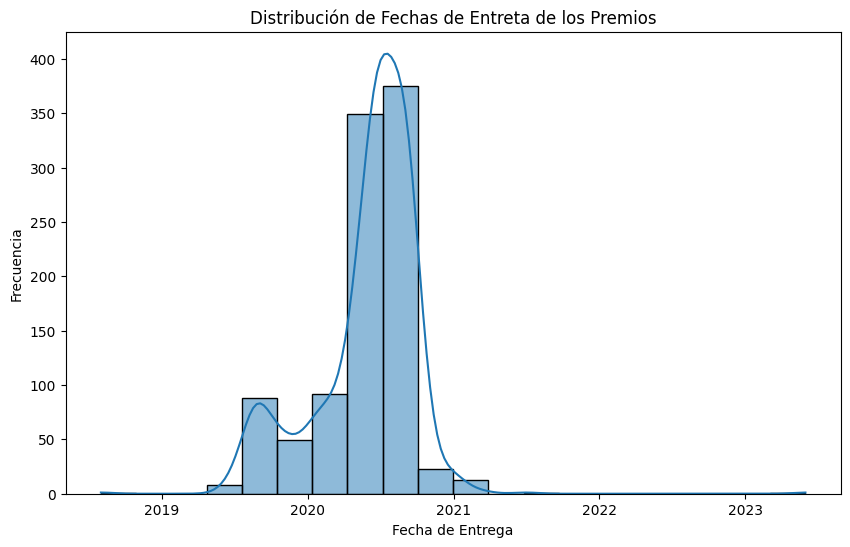

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(df_awards['AwardEffectiveDate'].dropna(), bins=20, kde=True)
plt.title('Distribución de Fechas de Entreta de los Premios')
plt.xlabel('Fecha de Entrega')
plt.ylabel('Frecuencia')
plt.show()

Hubo mas entregas de premios en los años 2020 y 2021

### Distribución de monto de los Premios

In [89]:
df_awards['AwardAmount'].sort_values()

63            0
672           0
874           0
414           0
857           0
         ...   
540    12213017
976    16000000
559    16000000
679    16000000
226    39209874
Name: AwardAmount, Length: 1000, dtype: int64

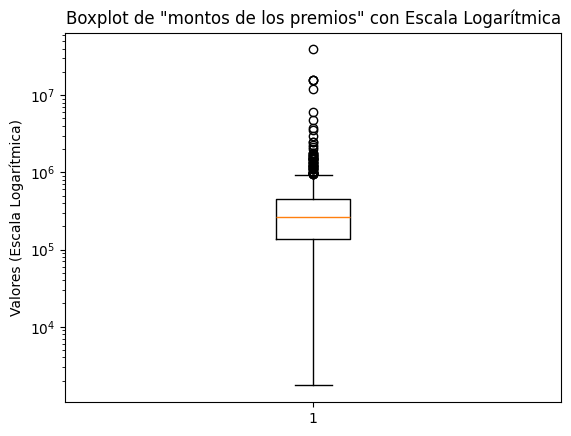

In [90]:
AwardAmount = df_awards[df_awards['AwardAmount'] > 0]['AwardAmount'].sort_values()
plt.boxplot(AwardAmount)
plt.yscale('log') 
plt.title('Boxplot de "montos de los premios" con Escala Logarítmica')
plt.ylabel('Valores (Escala Logarítmica)')
plt.show()

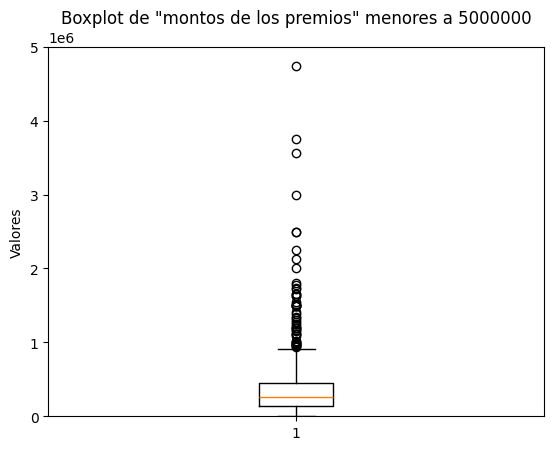

In [91]:
AwardAmount = df_awards[df_awards['AwardAmount'] > 0]['AwardAmount'].sort_values()
plt.boxplot(AwardAmount)
plt.ylim(0, 5000000) 
plt.title('Boxplot de "montos de los premios" menores a 5000000')
plt.ylabel('Valores')
plt.show()

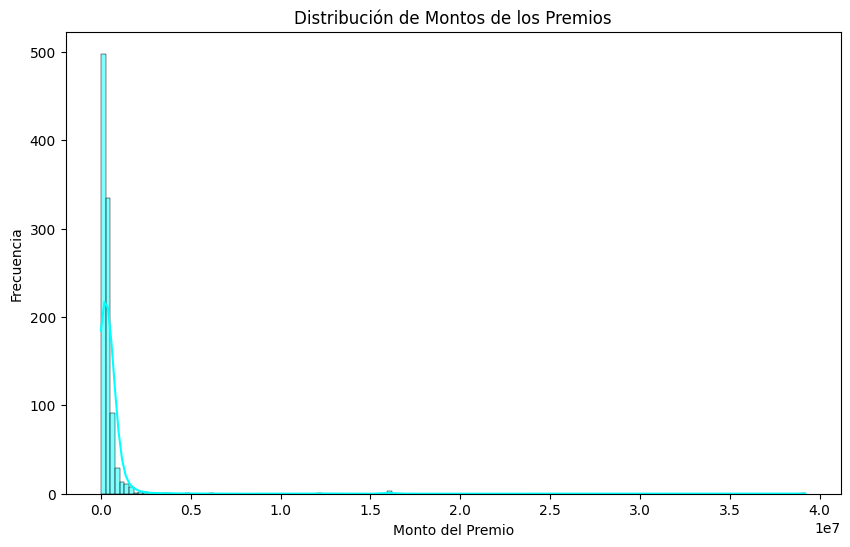

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df_awards['AwardAmount'], bins=150, kde=True, color='cyan')
plt.title('Distribución de Montos de los Premios')
plt.xlabel('Monto del Premio')
plt.ylabel('Frecuencia')
plt.show()

### Análisis de palabras claves en los Títulos y Resúmenes

In [92]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [93]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/juancarlos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Nube de palabras en títulos

In [94]:
titles_text = ' '.join(df_awards['AwardTitle'].dropna())
nltk_stopwords = set(stopwords.words('english'))
additional_stopwords = {'br', 'gt', 'lt', 'NSF'}  # Agrega tus stopwords aquí
stopwords_combined = nltk_stopwords.union(additional_stopwords)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=nltk_stopwords).generate(titles_text)

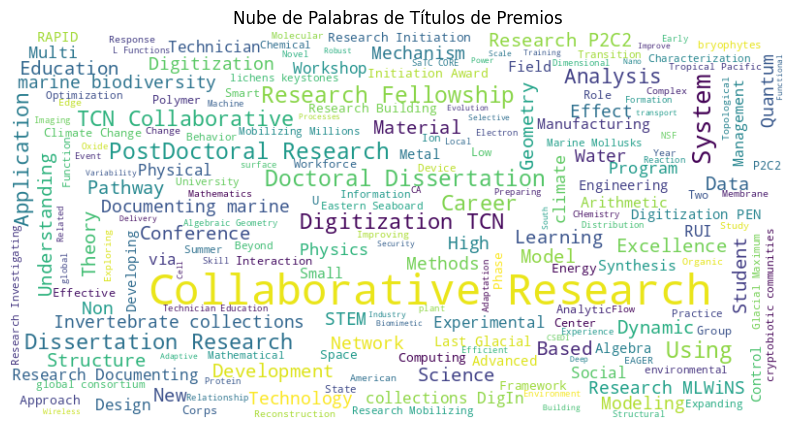

In [95]:
# Generando nube de palabras para los títulos de los premios
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos de Premios')
plt.show()

#### Nube de palabras en resúmenes (cuerpo/abstract)

In [96]:
# Generando nube de palabras para los resúmenes de los premios
abstracts_text = ' '.join(df_awards['AbstractNarration'].dropna())
additional_stopwords = {'br', 'gt', 'lt', 'NSF'}  # Agrega tus stopwords aquí
stopwords_combined = nltk_stopwords.union(additional_stopwords)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_combined).generate(abstracts_text)

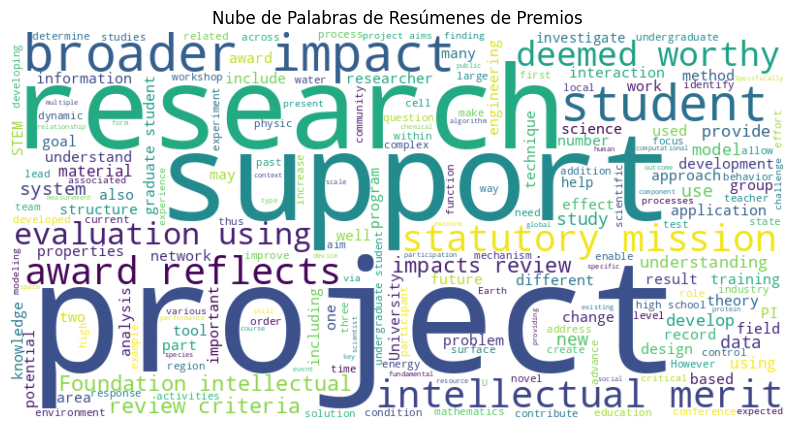

In [97]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Resúmenes de Premios')
plt.show()

### Identificación de datos faltantes

Desde el inicio con la función ***df_awards.info()*** pudimos notar que habían datos faltantes (después de procesar valores '', 'null', 'NA').
Pero si los hubiera, puede ser una mejor manera verlos gráficamente.

In [98]:
missing_data = df_awards.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
print(missing_data)

AbstractNarration    14
dtype: int64


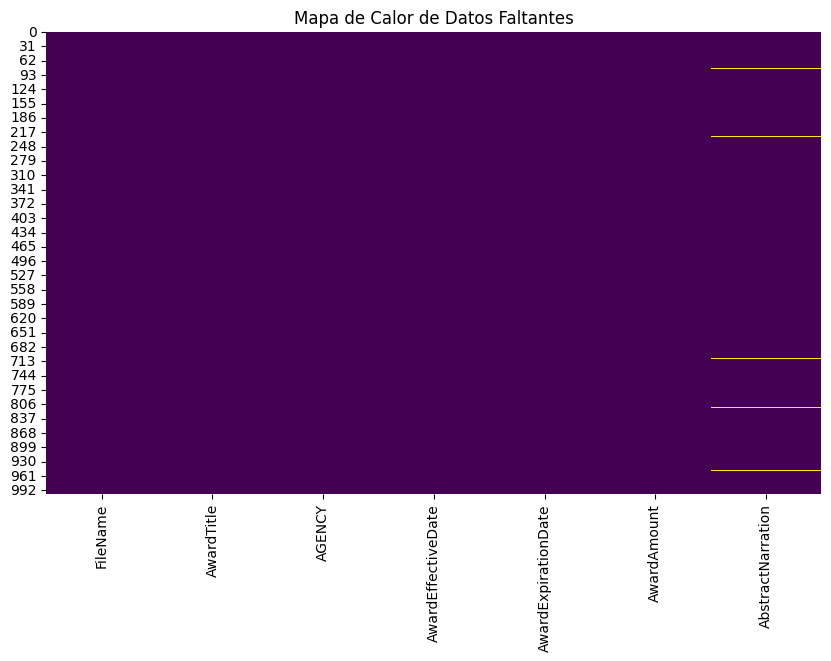

In [99]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_awards.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes')
plt.show()

In [101]:
folder_path = parent_dir + '/' + 'data/processed'
file_name = 'data_awards.csv'
file_path_to_save = os.path.join(folder_path, file_name)
df_awards.to_csv(file_path_to_save, index=False)

## Conclusiones

- Los datos tienen una estructura clara con información clave como títulos, fechas y resúmenes.
- Hay variabilidad en los montos de los premios y en las fechas de vigencia.


### Próximos Pasos
1. Manejar los datos faltantes (rellenar o eliminar según corresponda) si se llegaran a presentar.
2. Procesar los resúmenes de los premios para extracción de características.
3. Desarrollar el pipeline de procesamiento de datos y modelado.
4. Implementar y entrenar el modelo de clustering.
5. Evaluar y visualizar los resultados del clustering.